In [1]:
import pandas as pd
from google.colab import files

file = files.upload()
data = pd.read_csv('twitter.csv')

Saving twitter.csv to twitter.csv


In [2]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
data.shape

(74681, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data.columns = ['Tweet_Id','Topic','Sentiment','Text']

In [6]:
data.isnull().sum()

,0
Tweet_Id,0
Topic,0
Sentiment,0
Text,686


In [7]:
print("Number of Rows and Columns:",data.shape)
print("The Amount of Missing Values in the Text Column:", data['Text'].isna().sum())

Number of Rows and Columns: (74681, 4)
The Amount of Missing Values in the Text Column: 686


In [8]:
data = data.dropna(subset = ['Text']).reset_index(drop=True)

In [9]:
data = data.drop_duplicates(subset = ['Text']).reset_index(drop = True)

In [10]:
print("Final Data Condition After Handling Missing Values and Handling Duplicates:",
      data.shape)

Final Data Condition After Handling Missing Values and Handling Duplicates: (69490, 4)


In [11]:
data.head()

,Tweet_Id,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Sentiment
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


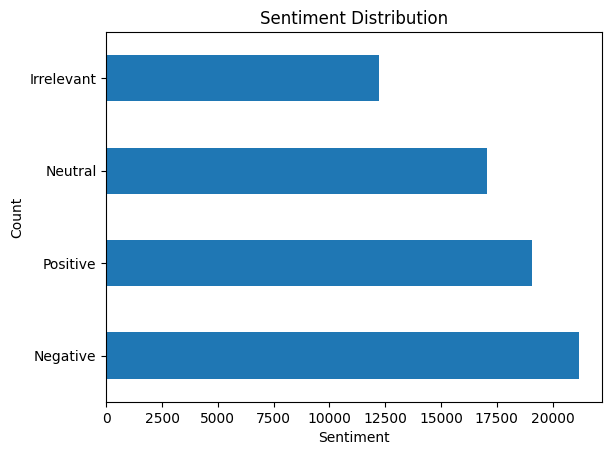

In [12]:
import matplotlib.pyplot as plt

SentimentCount  = data["Sentiment"].value_counts()
print(SentimentCount)

plt.figure()
SentimentCount.plot(kind='barh')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

count    69490.000000
mean        19.944481
std         14.247607
min          0.000000
25%          9.000000
50%         16.000000
75%         28.000000
max        198.000000
Name: Text_Length, dtype: float64


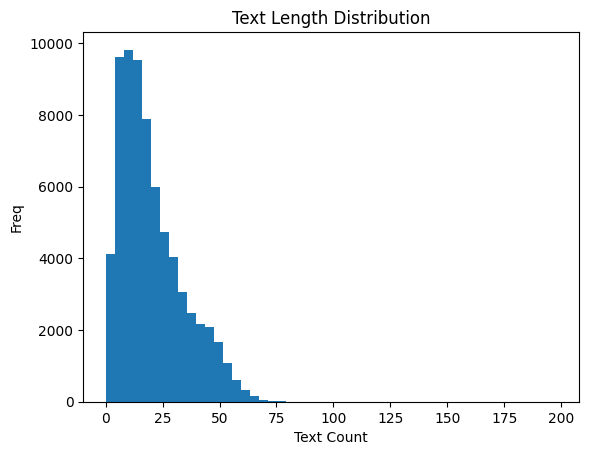

In [13]:
data['Text_Length'] = data['Text'].astype(str).apply(lambda x : len(x.split(

)))

print(data['Text_Length'].describe())

plt.figure()
plt.hist(data['Text_Length'], bins = 50)
plt.title("Text Length Distribution")
plt.xlabel("Text Count")
plt.ylabel('Freq')
plt.show()

<Figure size 640x480 with 0 Axes>

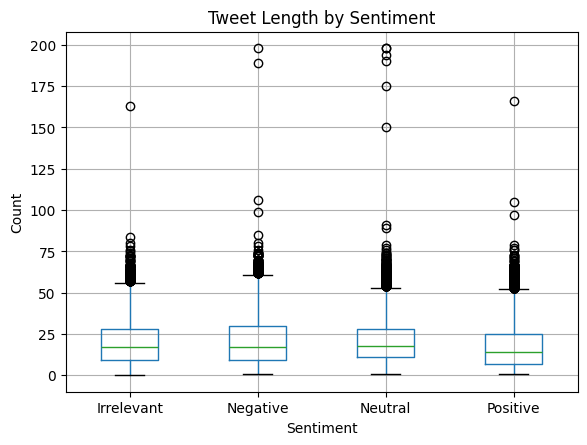

In [14]:
plt.figure()
data.boxplot(column='Text_Length',by = 'Sentiment')
plt.title("Tweet Length by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [15]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 5.1 MB/s eta 0:00:00


In [16]:
import re
import pandas as pd
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

negation_words = {
    "no","not","nor","never","cannot","can't","won't",
    "don't","didn't","isn't","aren't","wasn't","weren't",
    "shouldn't","wouldn't","couldn't", "haven't"
}

stop_words = stop_words - negation_words

lemmatizer = WordNetLemmatizer()

def normalize_contractions(text):
    text = re.sub(r"won\s*[’']?\s*t", "will not", text)
    text = re.sub(r"can\s*[’']?\s*t", "cannot", text)
    text = re.sub(r"haven\s*[’']?\s*t", "have not", text)
    text = re.sub(r"hasn\s*[’']?\s*t", "has not", text)
    text = re.sub(r"hadn\s*[’']?\s*t", "had not", text)
    text = re.sub(r"don\s*[’']?\s*t", "do not", text)
    text = re.sub(r"didn\s*[’']?\s*t", "did not", text)
    text = re.sub(r"isn\s*[’']?\s*t", "is not", text)
    text = re.sub(r"aren\s*[’']?\s*t", "are not", text)
    text = re.sub(r"wasn\s*[’']?\s*t", "was not", text)
    text = re.sub(r"weren\s*[’']?\s*t", "were not", text)
    text = re.sub(r"shouldn\s*[’']?\s*t", "should not", text)
    text = re.sub(r"wouldn\s*[’']?\s*t", "would not", text)
    text = re.sub(r"couldn\s*[’']?\s*t", "could not", text)
    return text

def normalize_spaced_urls(text):
    text = re.sub(r"https?\s*:\s*/\s*/", "https://", text)

    text = re.sub(r"\s*\.\s*", ".", text)

    text = re.sub(r"\s*/\s*", "/", text)

    text = re.sub(r"\s*\?\s*", "?", text)
    text = re.sub(r"\s*=\s*", "=", text)

    return text

def clean_tweet(text):
    text = text.lower().strip()

    text = normalize_spaced_urls(text)
    text = normalize_contractions(text)


    if (
        re.search(r"https?://|www\.", text) or
        re.search(r"\b(t\.co|twib|buff|zpr)\b", text) or
        re.search(r"\bvia\s", text) or
        re.search(r"watch\?v=", text)
    ):
        if len(text.split()) >= 6:
            return ""


    if re.search(r"\b(dlvr|from it|rmtrgf)\b", text):
        return ""


    if re.fullmatch(r"[.\s]*\w+\.(tv|com|net|org|ly|io)/?\S*", text):
        return ""


    if len(re.findall(r"[a-z]", text)) < 5:
        return ""


    text = re.sub(r"\[unk\]|<unk>", " ", text)

    text = re.sub(
        r"(https?://\S+|www\.\S+|twitch\.tv/\S+|"
        r"pic\.twitter\.com\s*/?\s*\S+|"
        r"\b\w+\.(com|net|org|it|ly|io)\s*/?\s*\S+)",
        " ",
        text
    )

    text = re.sub(r"@\s*\w+", " ", text)
    text = re.sub(r"#(\w+)", r"\1", text)

    text = emoji.demojize(text, delimiters=(" ", " "))

    text = re.sub(r"(.)\1{2,}", r"\1\1", text)
    text = re.sub(r"\b[b-df-hj-np-tv-z]{5,}\b", " ", text)

    text = re.sub(r"[^a-z0-9_\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = [
        lemmatizer.lemmatize(w)
        for w in text.split()
        if w not in stop_words and len(w) > 2
    ]

    return " ".join(tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
data["Clean_Text"] = data['Text'].apply(clean_tweet)

In [18]:
data[['Sentiment','Text','Clean_Text']].tail(150)

,Sentiment,Text,Clean_Text
69340,Negative,@NVIDIASHIELD I just got our brand new Nvidia ...,got brand new nvidia geforce controller gamepa...
69341,Negative,@NVIDIASHIELD I just got a really brand new Nv...,got really brand new nvidia shield dual contro...
69342,Negative,@NVIDIASHIELD just just got a brand new Nvidia...,got brand new nvidia remote controller gamepad...
69343,Neutral,What's Hot for,hot
69344,Neutral,And What's next for,next
...,...,...,...
69485,Positive,Just realized that the Windows partition of my...,realized window partition mac like year behind...
69486,Positive,Just realized that my Mac window partition is ...,realized mac window partition year behind nvid...
69487,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year behind nvid...
69488,Positive,Just realized between the windows partition of...,realized window partition mac like year behind...
